In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 10
)
image_generator_test = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

In [3]:
path_train = "../input/emotion-detection-fer/train"
path_test = "../input/emotion-detection-fer/test"
Train = image_generator.flow_from_directory(
    path_train,
    class_mode = "categorical",
    batch_size= 64,
    target_size = (48,48),
    color_mode = "grayscale"
)
Test = image_generator_test.flow_from_directory(
    path_test,
    class_mode = "categorical",
    batch_size= 64,
    target_size = (48,48),
    color_mode = "grayscale"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
model = Sequential()
model.add(Conv2D(64,(3, 3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3)) 
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)      

In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("Emotion.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [8]:
history = model.fit(Train,
                   epochs=60,
                   validation_data=Test,
                   callbacks=[checkpoint])

2022-04-22 19:26:16.296275: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-04-22 19:26:19.687692: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


449/449 [==============================] - 264s 567ms/step - loss: 2.0784 - accuracy: 0.2244 - val_loss: 2.0168 - val_accuracy: 0.2067
Epoch 2/60
449/449 [==============================] - 48s 106ms/step - loss: 1.7374 - accuracy: 0.3217 - val_loss: 1.6369 - val_accuracy: 0.3774
Epoch 3/60
449/449 [==============================] - 47s 105ms/step - loss: 1.5191 - accuracy: 0.4126 - val_loss: 1.7962 - val_accuracy: 0.3575
Epoch 4/60
449/449 [==============================] - 48s 107ms/step - loss: 1.3602 - accuracy: 0.4813 - val_loss: 1.4568 - val_accuracy: 0.4815
Epoch 5/60
449/449 [==============================] - 47s 106ms/step - loss: 1.2725 - accuracy: 0.5140 - val_loss: 1.1906 - val_accuracy: 0.5456
Epoch 6/60
449/449 [==============================] - 47s 104ms/step - loss: 1.2225 - accuracy: 0.5340 - val_loss: 1.1768 - val_accuracy: 0.5482
Epoch 7/60
449/449 [==============================] - 47s 104ms/step - loss: 1.1817 - accuracy: 0.5505 - val_loss: 1.3389 - val_accuracy: 0.

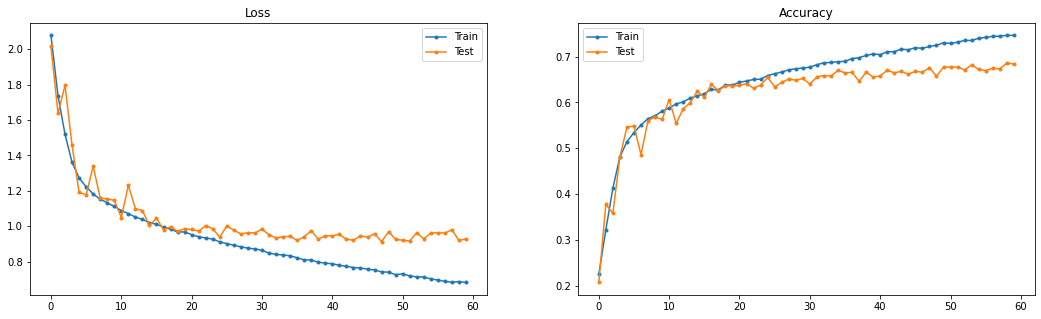

In [9]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()